# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

_Scraping_ data merupakan hal yang dibutuhkan oleh perusahaan tempat saya bekerja, terutama website yang berhubungan dengan data pangan nasional, contohnya https://www.bi.go.id/hargapangan. Data yang telah di-_scrap_ akan ditampilkan dalam dashboard yang telah dikembangkan oleh tim IT kami. 

Dengan memilih topik ini, diharapkan data yang telah diperoleh dari website luar dapat memberikan insight baru bagi perusahaan.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [102]:
import requests

# url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T') #EZ
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2023-01-01,2023-7-31') #MEDIUM
# url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/1') # HARDCORE

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [103]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [104]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [105]:
# table = 
# ==================== ALL ====================
table = soup.find('div', attrs={'class':'lister-list'})
print(table)

<div class="lister-list">
<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt15398776"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt15398776/"> <img alt="Oppenheimer" class="loadlate" data-tconst="tt15398776" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMDBmYTZjNjUtN2M1MS00MTQ2LTk2ODgtNzc2M2QyZGE5NTVjXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt15398776/">Oppenheimer</a>
<span class="lister-item-year text-muted unbold">(2023)</span>
</h3>
<p class="text-muted">
<span class="certificate">13+</span>
<span class="ghost">|</span>
<span class="runtime">180 min</span>
<span class="ghost">|</span>
<span class="genre"

Finding row length.

In [106]:
data_list = table.find_all('div', attrs={'class':'lister-item'})
print(data_list[1])

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt1517268"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt1517268/"> <img alt="Barbie" class="loadlate" data-tconst="tt1517268" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNjU3N2QxNzYtMjk1NC00MTc4LTk1NTQtMmUxNTljM2I0NDA5XkEyXkFqcGdeQXVyODE5NzE3OTE@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">2.</span>
<a href="/title/tt1517268/">Barbie</a>
<span class="lister-item-year text-muted unbold">(I) (2023)</span>
</h3>
<p class="text-muted">
<span class="certificate">13+</span>
<span class="ghost">|</span>
<span class="runtime">114 min</span>
<span class="ghost">|</span>
<span class="genre">
Adventure, Comedy, Fantasy        

In [107]:
row_length = len(table.find_all('h3', attrs={'class':'lister-item-header'}))
row_length

50

## SCRAPING DATA

In [108]:
temp = []
for i in range(0, row_length):
#     c = BeautifulSoup()
    judul       = data_list[i].find('h3', attrs={'class':'lister-item-header'})
    if judul is None:
        judul = '-'
    else:
        judul = judul.text

    imdb_rating = data_list[i].find('div', attrs={'class':'inline-block ratings-imdb-rating'})
    if imdb_rating is None:
        imdb_rating = '0'
    else:
        imdb_rating = imdb_rating.text
    
    metascore   = data_list[i].find('span', attrs={'class':'metascore'})
    if metascore is None:
        metascore = '0'
    else:
        metascore = metascore.text

    votes       = data_list[i].find('span', attrs={'name':'nv'})
    if votes is None:
        votes = '0'
    else:
        votes = votes.text

    # print(judul)
    # print('----------------')
    # print(imdb_rating)
    # print('----------------')
    # print(metascore)
    # print('----------------')
    # print(votes)
    # print('======================')
    
    temp.append((judul,imdb_rating,metascore,votes))

temp 

[('\n1.\nOppenheimer\n(2023)\n', '\n\n8.6\n', '88        ', '410,591'),
 ('\n2.\nBarbie\n(I) (2023)\n', '\n\n7.3\n', '80        ', '273,743'),
 ('\n3.\nNo Hard Feelings\n(2023)\n', '\n\n6.4\n', '59        ', '60,507'),
 ('\n4.\nSpecial Ops: Lioness\n(2023– )\n', '\n\n7.7\n', '0', '13,353'),
 ('\n5.\nGuardians of the Galaxy Vol. 3\n(2023)\n',
  '\n\n8.0\n',
  '64        ',
  '306,057'),
 ('\n6.\nMeg 2: The Trench\n(2023)\n', '\n\n5.2\n', '40        ', '35,029'),
 ('\n7.\nGran Turismo\n(2023)\n', '\n\n7.4\n', '47        ', '18,536'),
 ('\n8.\nSpider-Man: Across the Spider-Verse\n(2023)\n',
  '\n\n8.8\n',
  '86        ',
  '247,808'),
 ("\n9.\nThe Pope's Exorcist\n(2023)\n", '\n\n6.1\n', '45        ', '59,034'),
 ('\n10.\nTeenage Mutant Ninja Turtles: Mutant Mayhem\n(2023)\n',
  '\n\n7.4\n',
  '74        ',
  '25,070'),
 ('\n11.\nDungeons & Dragons: Honor Among Thieves\n(2023)\n',
  '\n\n7.3\n',
  '72        ',
  '175,812'),
 ('\n12.\nThe Flash\n(I) (2023)\n', '\n\n6.8\n', '55        ', '

## Creating data frame & Data wrangling

Put the array into dataframe

In [109]:
import pandas as pd

data = pd.DataFrame(temp)
# data = pd.DataFrame(temp,columns=('judul','imdb_rating','metascore','votes'))
data.head()

,0,1,2,3
0,\n1.\nOppenheimer\n(2023)\n,\n\n8.6\n,88,"410,591"
1,\n2.\nBarbie\n(I) (2023)\n,\n\n7.3\n,80,"273,743"
2,\n3.\nNo Hard Feelings\n(2023)\n,\n\n6.4\n,59,"60,507"
3,\n4.\nSpecial Ops: Lioness\n(2023– )\n,\n\n7.7\n,0,"13,353"
4,\n5.\nGuardians of the Galaxy Vol. 3\n(2023)\n,\n\n8.0\n,64,"306,057"


## __CLEANSING DATA__
***
#### Setelah data disimpan menjadi dataframe, maka perlu dilakukan cleansing data dengan beberapa tahap yaitu:
> 1. Rename nama kolom untuk mempermudah pengolahan data
> 2. Menghilangkan teks "\n" karena teks tersebut hanya komponen html yang sudah tidak akan dipakai
> 3. Menghapus nomor urut dari kolom judul/substring dikarenakan nomor tersebut tidak akan dipakai untuk indexing
> 4. Penyesuaian tipe kolom

In [110]:
# 1. RENAME KOLOM
data.rename(columns={0:'judul',1:'imdb_rating',2:'metascore',3:'votes'},inplace=True)

In [111]:
# 2.a. REMOVE "\n"
data = data.replace('\n','', regex=True)

# 2.b. REMOVE ","
data['votes'] = data['votes'].replace(',','', regex=True)

In [112]:
# 3.a. MENGHAPUS NOMOR DI KOLOM JUDUL (INDEX 0-9)
data10 = data.iloc[0:9,:]
data10['judul'] = data10['judul'].str[2:100]

/var/folders/mf/yz4lcqtn7sxcz86216_j2xf00000gn/T/ipykernel_93372/3088232960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data10['judul'] = data10['judul'].str[2:100]


In [113]:
# 3.b. MENGHAPUS NOMOR DI KOLOM JUDUL (INDEX 10-55)
data11 = data.iloc[9:55,:]
data11['judul'] = data11['judul'].str[3:100]

/var/folders/mf/yz4lcqtn7sxcz86216_j2xf00000gn/T/ipykernel_93372/3223826788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data11['judul'] = data11['judul'].str[3:100]


In [114]:
# 3.c. MENGGABUNGKAN 2 DATAFRAME HASIL SYNTAX DI ATAS
data_union = pd.concat([data10,data11])
data_union

,judul,imdb_rating,metascore,votes
0,Oppenheimer(2023),8.6,88,410591
1,Barbie(I) (2023),7.3,80,273743
2,No Hard Feelings(2023),6.4,59,60507
3,Special Ops: Lioness(2023– ),7.7,0,13353
4,Guardians of the Galaxy Vol. 3(2023),8.0,64,306057
5,Meg 2: The Trench(2023),5.2,40,35029
6,Gran Turismo(2023),7.4,47,18536
7,Spider-Man: Across the Spider-Verse(2023),8.8,86,247808
8,The Pope's Exorcist(2023),6.1,45,59034
9,Teenage Mutant Ninja Turtles: Mutant Mayhem(2023),7.4,74,25070


In [115]:
# 4. MENGUBAH TIPE KOLOM
data_union['imdb_rating'] = data_union['imdb_rating'].astype('float')
data_union['metascore'] = data_union['metascore'].astype('float')
data_union['votes'] = data_union['votes'].astype('float')
data_union.dtypes

judul           object
imdb_rating    float64
metascore      float64
votes          float64
dtype: object

## __DATA VISUALISATION__
***
#### Setelah dataframe telah _clean & clear_ maka data dapat ditampilkan dalam bentuk plot, dengan tahapan:
> 1. Mengambil top 7 film terpopuler based on IMDB Rating, Metascore, & Votes
> 2. Mengubah kolom Judul menjadi index
> 3. Buat plot dari 7 film terpopuler, untuk masing-masing kolom, dengan value yang telah diurutkan

In [116]:
# 1. UBAH JUDUL MENJADI INDEX
data_union = data_union.set_index('judul')
data_union

,imdb_rating,metascore,votes
judul,,,
Oppenheimer(2023),8.6,88.0,410591.0
Barbie(I) (2023),7.3,80.0,273743.0
No Hard Feelings(2023),6.4,59.0,60507.0
Special Ops: Lioness(2023– ),7.7,0.0,13353.0
Guardians of the Galaxy Vol. 3(2023),8.0,64.0,306057.0
Meg 2: The Trench(2023),5.2,40.0,35029.0
Gran Turismo(2023),7.4,47.0,18536.0
Spider-Man: Across the Spider-Verse(2023),8.8,86.0,247808.0
The Pope's Exorcist(2023),6.1,45.0,59034.0


<Axes: ylabel='judul'>

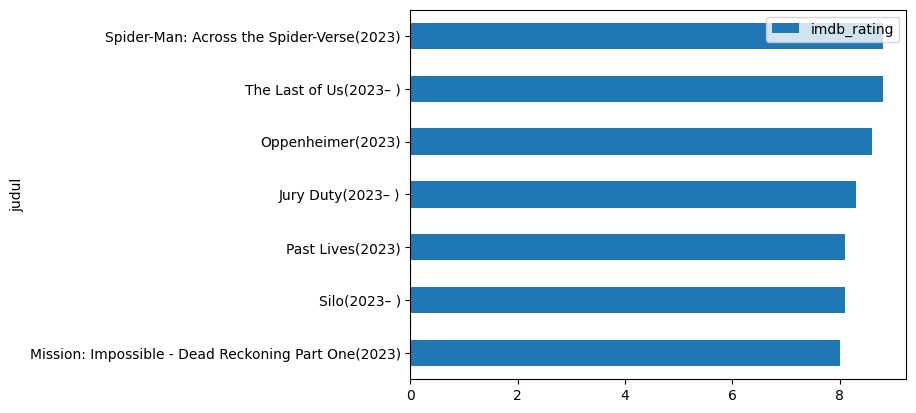

In [117]:
# PLOTTING CHART BY IMDB_RATING
df_imdb_rating = data_union.sort_values('imdb_rating',ascending=False).head(7)
df_imdb_rating = df_imdb_rating.drop(columns=['metascore','votes']).sort_values('imdb_rating',ascending=True).plot(kind='barh')
df_imdb_rating

<Axes: ylabel='judul'>

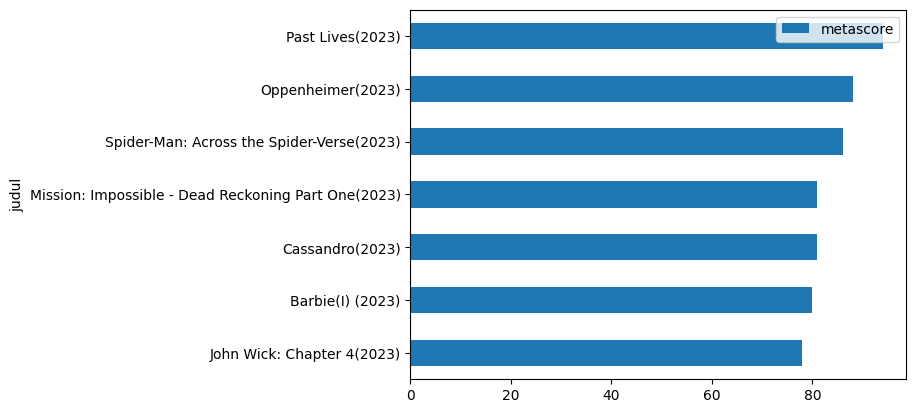

In [118]:
# PLOTTING CHART BY METASCORE
df_metascore = data_union.sort_values('metascore',ascending=False).head(7)
df_metascore = df_metascore.drop(columns=['imdb_rating','votes']).sort_values('metascore',ascending=True).plot(kind='barh')
df_metascore

<Axes: ylabel='judul'>

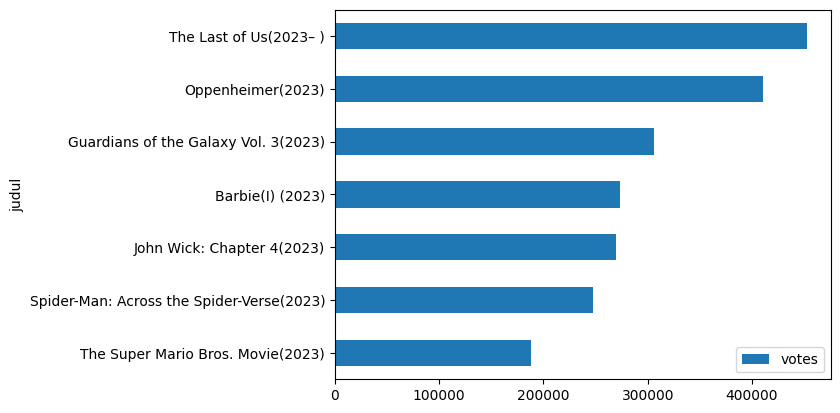

In [119]:
# PLOTTING CHART BY VOTES
df_votes = data_union.sort_values('votes',ascending=False).head(7)
df_votes = df_votes.drop(columns=['imdb_rating','metascore']).sort_values('votes',ascending=True).plot(kind='barh')
df_votes

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: ylabel='judul'>

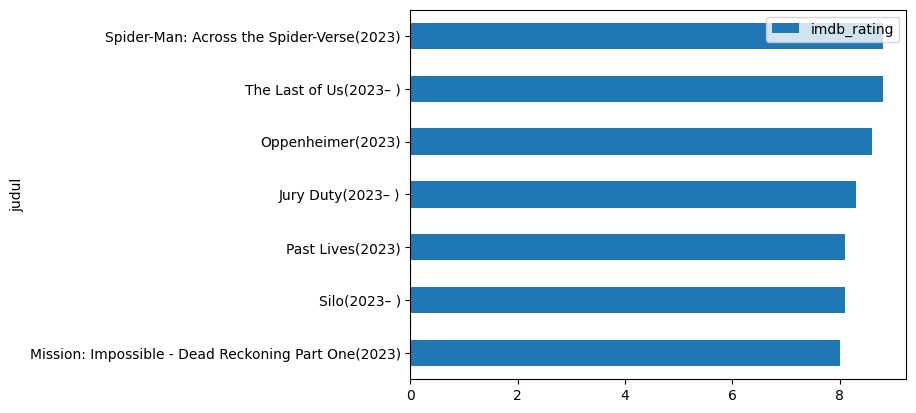

In [120]:
# PLOTTING CHART BY IMDB_RATING
df_imdb_rating = data_union.sort_values('imdb_rating',ascending=False).head(7)
df_imdb_rating = df_imdb_rating.drop(columns=['metascore','votes']).sort_values('imdb_rating',ascending=True).plot(kind='barh')
df_imdb_rating

#### Analysis & Conclusion (Part 1)
> 1. Jika diurutkan berdasarkan IMDB Rating, film __Spider-Man: Across the Spider Verse (2023)__ dan __The Last of Us (2023- )__ menjadi dua film terlaris, dengan nilai yang sama yaitu __8.8__
> 2. __Mission: Impossible - Dead Reckoning Part One (2023)__ menjadi film terlaris ketujuh dengan IMDB Rating __8.0__
***

<Axes: ylabel='judul'>

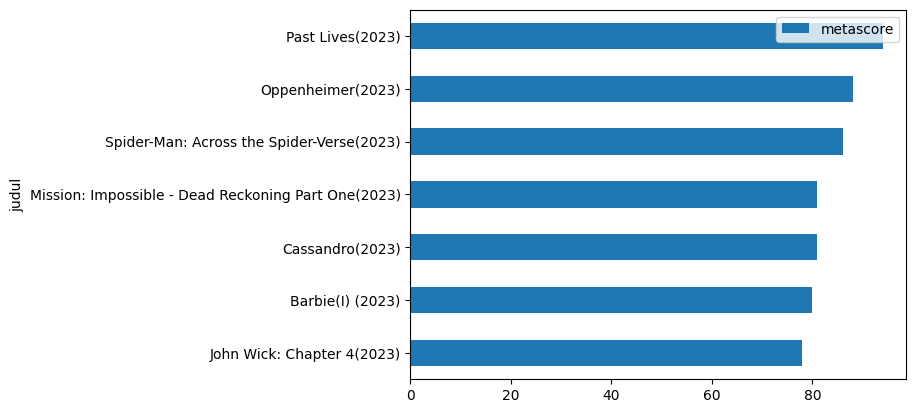

In [121]:
# PLOTTING CHART BY METASCORE
df_metascore = data_union.sort_values('metascore',ascending=False).head(7)
df_metascore = df_metascore.drop(columns=['imdb_rating','votes']).sort_values('metascore',ascending=True).plot(kind='barh')
df_metascore

#### Analysis & Conclusion (Part 2)
> 1. Film dengan Metascore tertinggi diraih oleh __Past Lives (2023)__ dengan nilai __94__
> 2. __John Wick: Chapter 4(2023)__ menjadi film dengan Metascore tertinggi yaitu __78__
***

<Axes: ylabel='judul'>

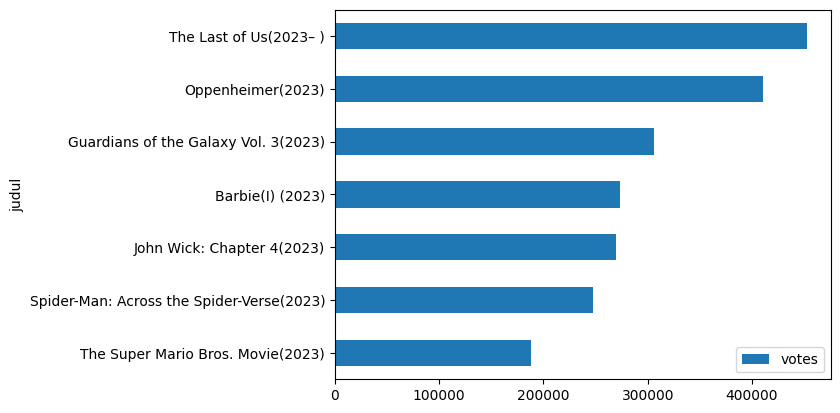

In [122]:
# PLOTTING CHART BY VOTES
df_votes = data_union.sort_values('votes',ascending=False).head(7)
df_votes = df_votes.drop(columns=['imdb_rating','metascore']).sort_values('votes',ascending=True).plot(kind='barh')
df_votes

#### Analysis & Conclusion (Part 3)
> 1. Film dengan Voting terbanyak diraih oleh __The Last of Us(2023- )__ dengan jumlah voting mencapai __453005__
> 2. Sedangkan __The Super Mario Bros. Movie(2023)__ menjadi film ketujuh dengan jumlah voting __187592__
***

#### __Final Analysis & Conclusion__
> 1. Ada beberapa parameter yang dapat dijadikan patokan dalam menentukan film terpopuler, di antaranya adalah IMDB Score, Metascore, serta Voting.
> 2. Parameter tersebut sejatinya dapat diberikan bobot, sehingga kita dapat melihat secara utuh film apa yang berhak menyandang predikat film terpopuler
***

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.